# Project 1: Part 2 (Pneumonia)

## Task 1: Exploratory Data Analysis
Below, a first analysis of the data is shown, whereby an imbalance between normal and infected samples was notices immediately. Especially the train split contains almost double the amount of infected samples compared to healthy samples.

### Analysis

<AxesSubplot:>

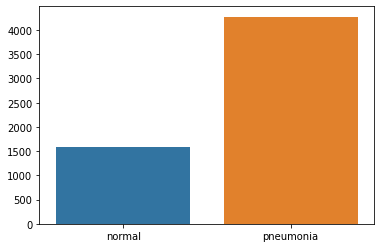

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# inspect the data
os.listdir('chest_xray/chest_xray')

# analyze number of images in each folder
train_normal = os.listdir('chest_xray/chest_xray/train/NORMAL')
train_pneumonia = os.listdir('chest_xray/chest_xray/train/PNEUMONIA')
test_normal = os.listdir('chest_xray/chest_xray/test/NORMAL')
test_pneumonia = os.listdir('chest_xray/chest_xray/test/PNEUMONIA')
val_normal = os.listdir('chest_xray/chest_xray/val/NORMAL')
val_pneumonia = os.listdir('chest_xray/chest_xray/val/PNEUMONIA')

# create a dataframe
df = pd.DataFrame({'train_normal': [len(train_normal)], 'train_pneumonia': [len(train_pneumonia)], 'test_normal': [len(test_normal)], 'test_pneumonia': [len(test_pneumonia)], 'val_normal': [len(val_normal)], 'val_pneumonia': [len(val_pneumonia)]})

# visualize normal vs pneumonia
normal = len(train_normal) + len(test_normal) +len(val_normal)
pneumonia = len(train_pneumonia) + len(test_pneumonia) + len(val_pneumonia)
df = pd.DataFrame({'normal': [normal], 'pneumonia': [pneumonia]})
sns.barplot(data=df)

### Preprocessing

In [2]:
import cv2
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
# load data
train = get_data('chest_xray/chest_xray/train')
test = get_data('chest_xray/chest_xray/test')
val = get_data('chest_xray/chest_xray/val')

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/tmp/ipykernel_24729/2721523318.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [4]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [5]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [6]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [51]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    rotation_range=20,
    # grayscale
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

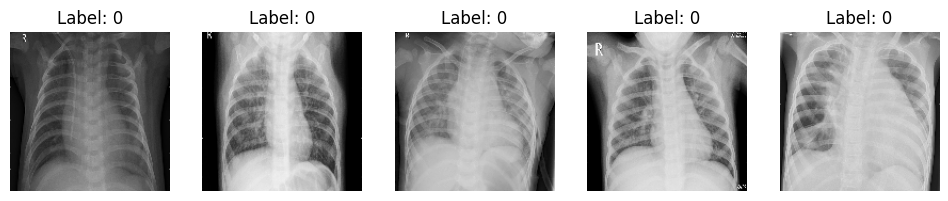

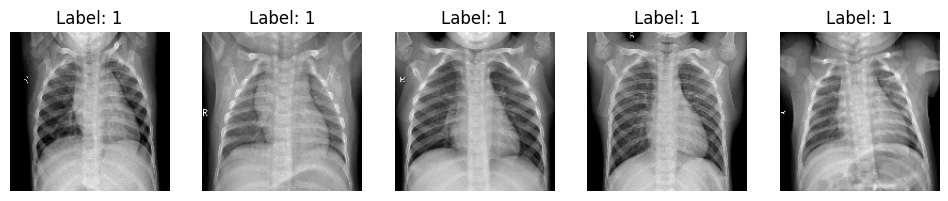

In [52]:
# visualize train data (5 normal)
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i].reshape(img_size, img_size), cmap='gray')
    plt.axis('off')
    plt.title('Label: {}'.format(y_train[i]))

# 5 pneumonia
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i+4000].reshape(img_size, img_size), cmap='gray')
    plt.axis('off')
    plt.title('Label: {}'.format(y_train[i+4000]))

## Task 2: Build CNN classifier

In [53]:
# build the CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# create the model
pneumonia_clf = Sequential()
pneumonia_clf.add(Conv2D(32, (3, 3), input_shape = (150, 150, 1), activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(MaxPooling2D(pool_size = (2, 2)))
pneumonia_clf.add(Dropout(0.1))

pneumonia_clf.add(Conv2D(64, (3, 3), activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(MaxPooling2D(pool_size = (2, 2)))
pneumonia_clf.add(Dropout(0.2))

pneumonia_clf.add(Conv2D(128, (3, 3), activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(MaxPooling2D(pool_size = (2, 2)))
pneumonia_clf.add(Dropout(0.2))

pneumonia_clf.add(Flatten())

pneumonia_clf.add(Dense(units = 128, activation = 'relu'))
pneumonia_clf.add(BatchNormalization())
pneumonia_clf.add(Dropout(0.2))

pneumonia_clf.add(Dense(units = 1, activation = 'sigmoid'))

# compile the model
pneumonia_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# model summary
pneumonia_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 64)      

In [54]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [55]:
# train the CNN
history = pneumonia_clf.fit_generator(data_generator.flow(x_train, y_train, batch_size=32),
                                        epochs=20, validation_data=(x_val, y_val),
                                        steps_per_epoch=x_train.shape[0] // 32,
                                        callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/20


/tmp/ipykernel_877030/961660134.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = pneumonia_clf.fit_generator(data_generator.flow(x_train, y_train, batch_size=32),


163/163 [==============================] - 6s 34ms/step - loss: 0.4097 - accuracy: 0.8296 - val_loss: 6.7586 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - 5s 33ms/step - loss: 0.2188 - accuracy: 0.9135 - val_loss: 2.5840 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - 5s 33ms/step - loss: 0.1864 - accuracy: 0.9258 - val_loss: 2.3290 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
163/163 [==============================] - ETA: 0s - loss: 0.1705 - accuracy: 0.9298
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
163/163 [==============================] - 5s 33ms/step - loss: 0.1705 - accuracy: 0.9298 - val_loss: 3.2357 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/20
163/163 [==============================] - 5s 34ms/step - loss: 0.1390 - accuracy: 0.9457 - val_loss: 1.2738 - val_accuracy: 0.5625 - lr: 5.0000e-04
Epoch 6/20
163/163 [==============================] - 5s 32ms/step

In [56]:
# inference on test set
pneumonia_clf.evaluate(x_test, y_test)

20/20 [==============================] - 0s 5ms/step - loss: 0.3576 - accuracy: 0.8590


[0.35756418108940125, 0.8589743375778198]

### Analysis of training

20/20 [==============================] - 0s 3ms/step


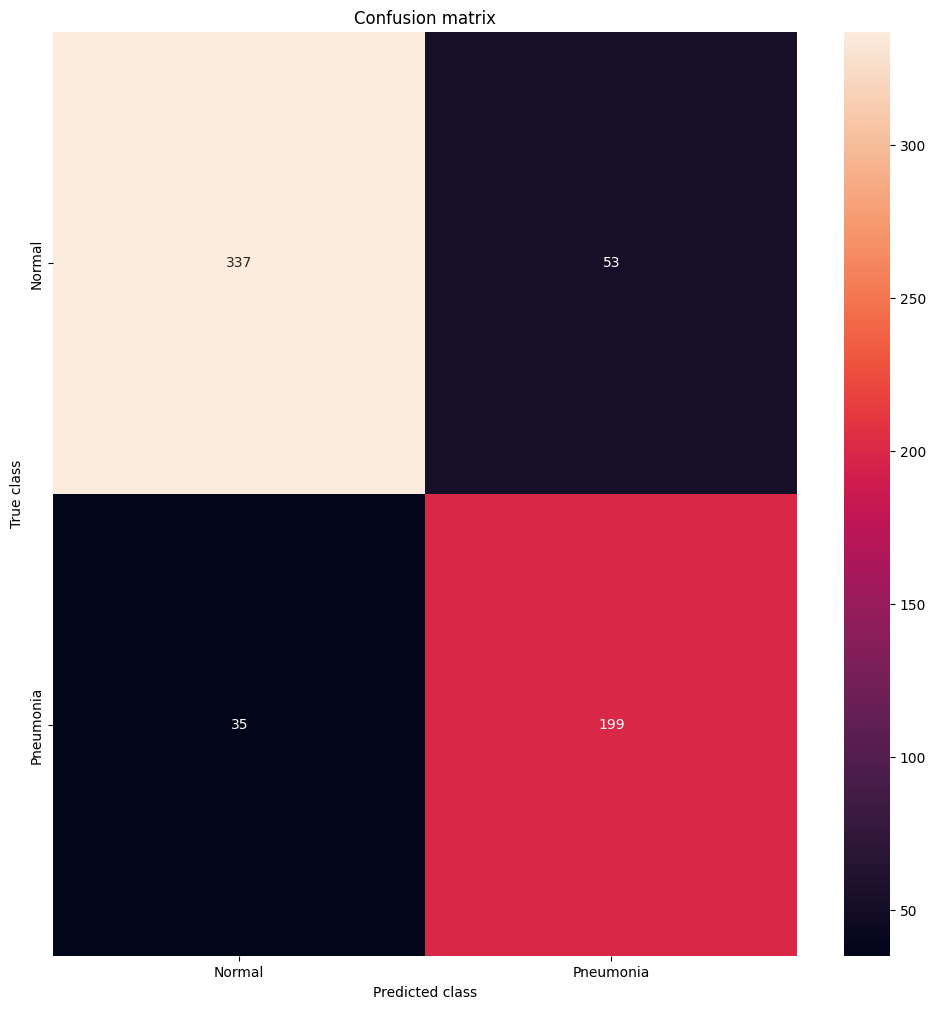

In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = pneumonia_clf.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

# axis labels
LABELS = ['Normal', 'Pneumonia']

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

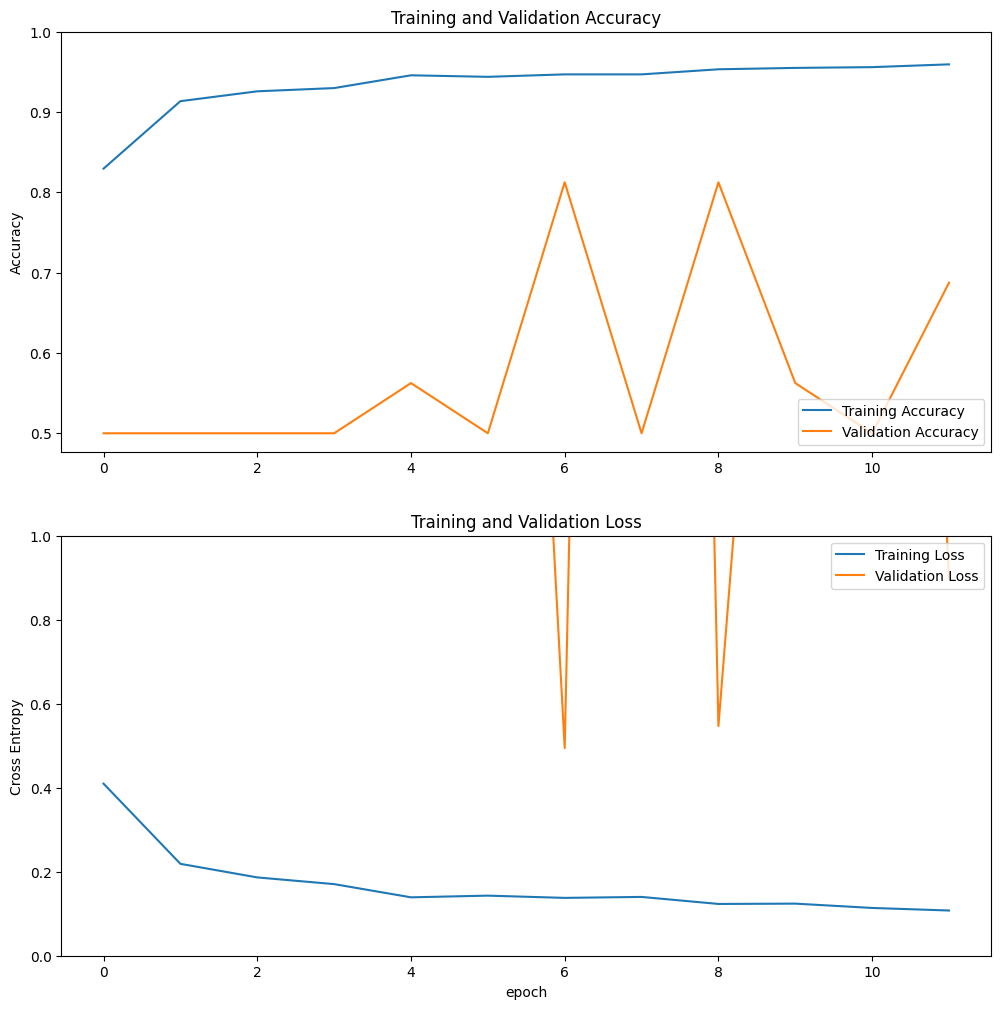

In [58]:
# analyze the training history
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

              precision    recall  f1-score   support

      Normal       0.91      0.86      0.88       390
   Pneumonia       0.79      0.85      0.82       234

    accuracy                           0.86       624
   macro avg       0.85      0.86      0.85       624
weighted avg       0.86      0.86      0.86       624

20/20 [==============================] - 0s 3ms/step


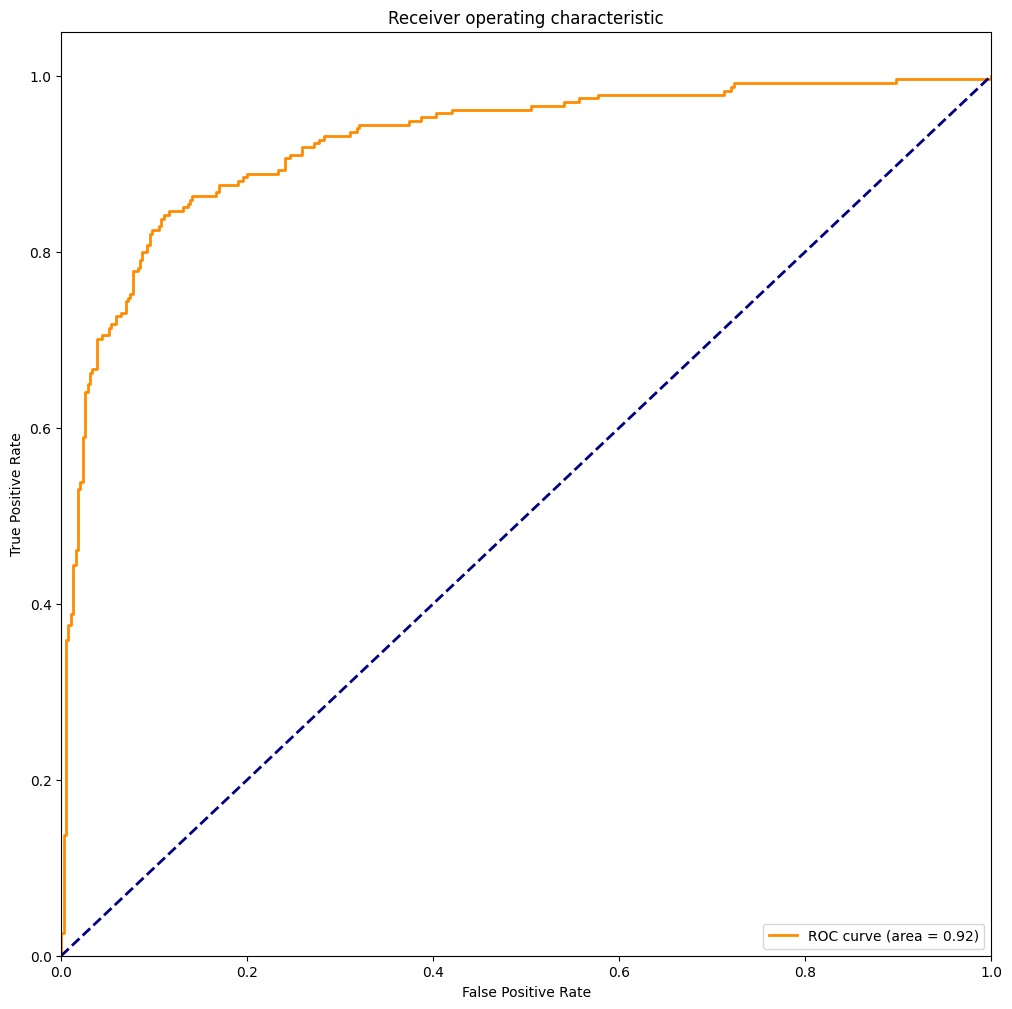

In [59]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=LABELS))

# ROC curve
from sklearn.metrics import roc_curve, auc
# get the probabilities for the predictions
y_pred_proba = pneumonia_clf.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [60]:
# predictions on test data
pred = pneumonia_clf.predict(x_test)
pred = np.round(pred)
pred = pred.astype(int)
pred = pred.reshape(-1)
pred[:10]

20/20 [==============================] - 0s 3ms/step


array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [61]:
# compare correct and incorrect predictions
correct = np.nonzero(pred == y_test)[0]
incorrect = np.nonzero(pred != y_test)[0]

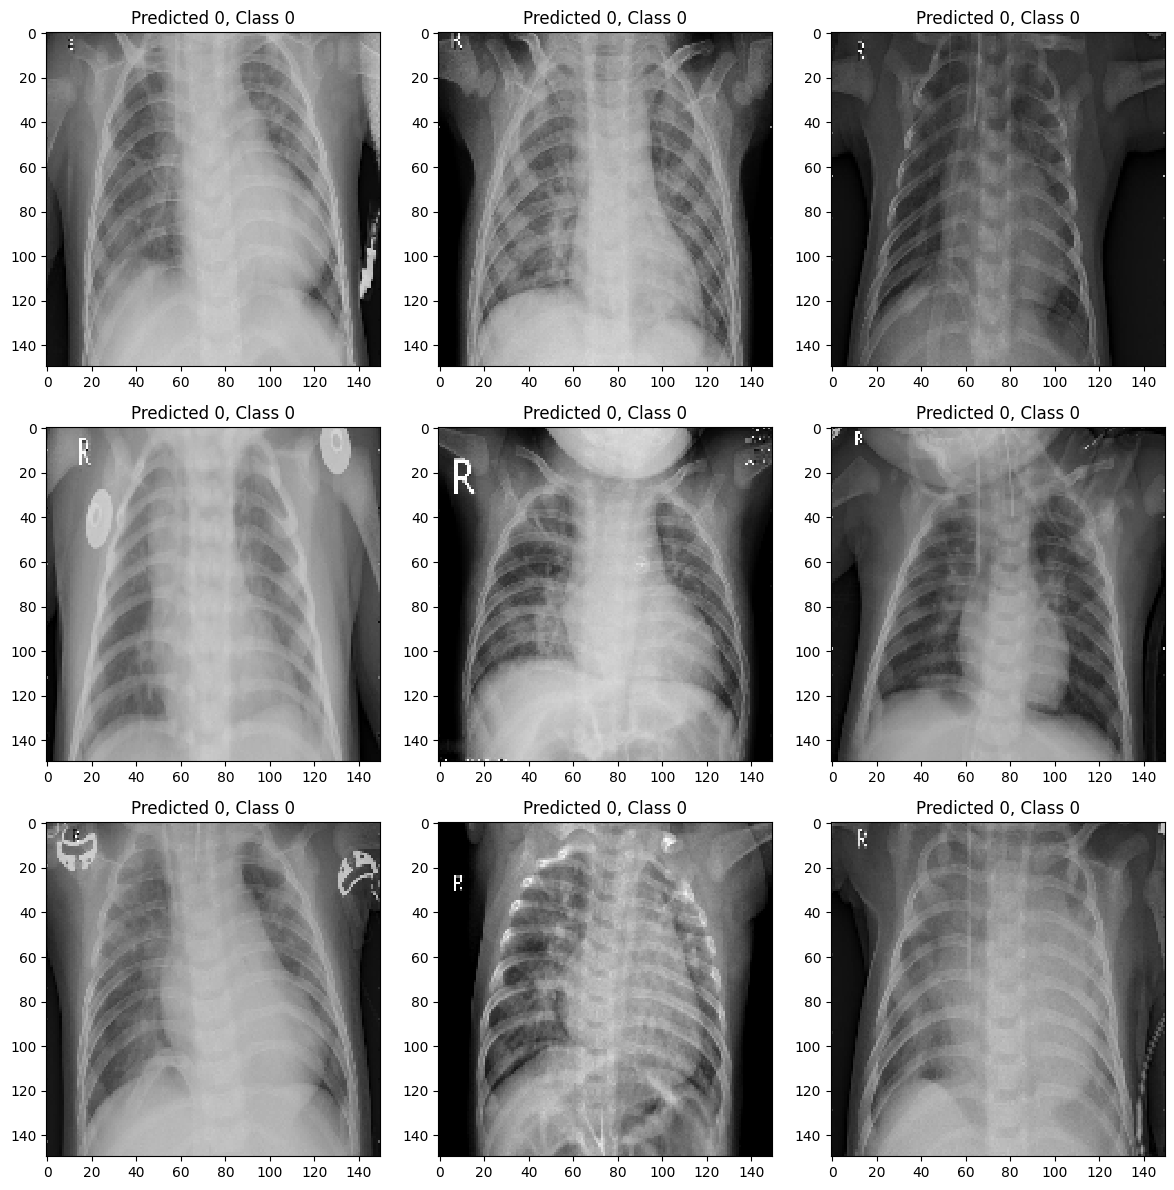

In [62]:
# visualize correct predictions
plt.figure(figsize=(12, 12))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[correct].reshape(img_size, img_size), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))
    plt.tight_layout()

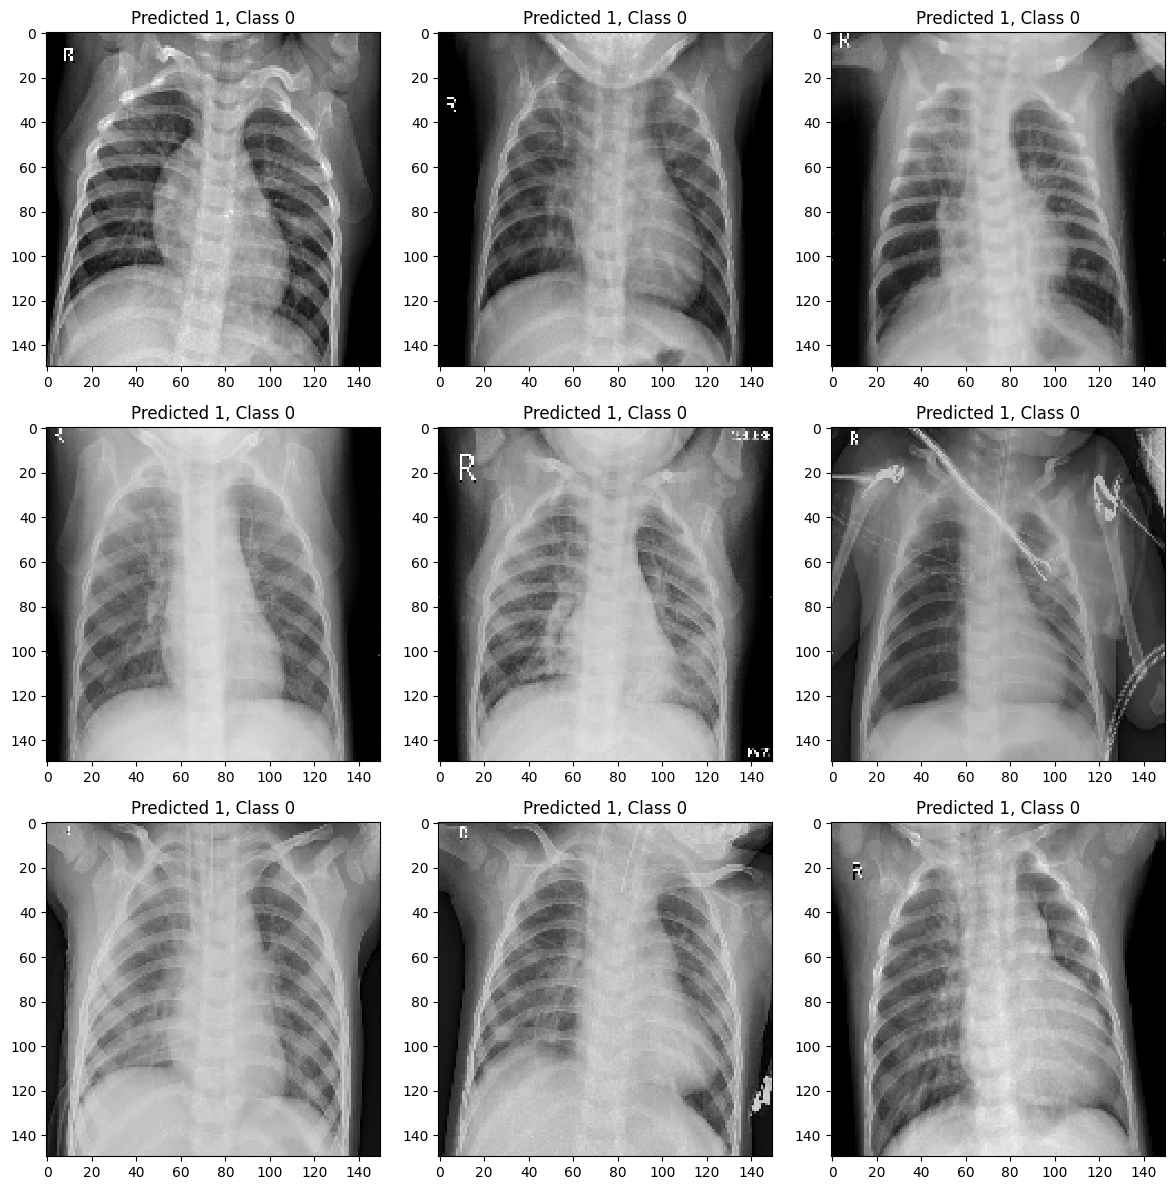

In [63]:
# visualize incorrect predictions
plt.figure(figsize=(12, 12))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[incorrect].reshape(img_size, img_size), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [64]:
# save the CNN
pneumonia_clf.save('models/pneumonia.h5')

## Task 3: Integrated Gradients

In [65]:
# load model
from keras.models import load_model
pneumonia_clf = load_model('models/pneumonia.h5')

In [66]:
# establish a baseline
import tensorflow as tf
baseline = tf.zeros(shape=(150, 150, 1))

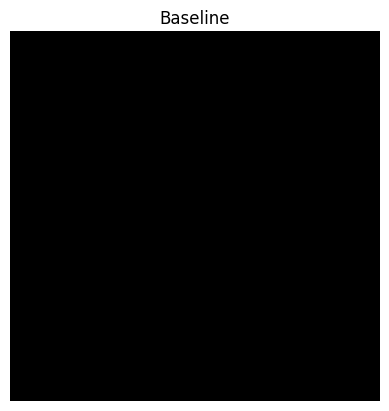

In [67]:
import matplotlib.pyplot as plt
plt.imshow(baseline, cmap='gray', interpolation='none')
plt.title("Baseline")
plt.axis('off')
plt.show()

In [68]:
# generate linear interpolation
m_steps=50
alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1) # Generate m_steps intervals for integral_approximation() below.

def interpolate_images(baseline,
                       image,
                       alphas):
  baseline = tf.cast(baseline, tf.float32)
  image = tf.cast(image, tf.float32)
  alphas_x = alphas[:, tf.newaxis, tf.newaxis, tf.newaxis]
  baseline_x = tf.expand_dims(baseline, axis=0)
  input_x = tf.expand_dims(image, axis=0)
  print("Baseline shape: ", baseline_x.shape)
  print("Image shape: ", input_x.shape)
  print("Alphas shape: ", alphas_x.shape)
  delta = input_x - baseline_x
  images = baseline_x +  alphas_x * delta
  return images

interpolated_img = interpolate_images(baseline=baseline,
                                        image=x_test[0],
                                        alphas=alphas)

Baseline shape:  (1, 150, 150, 1)
Image shape:  (1, 150, 150, 1)
Alphas shape:  (51, 1, 1, 1)


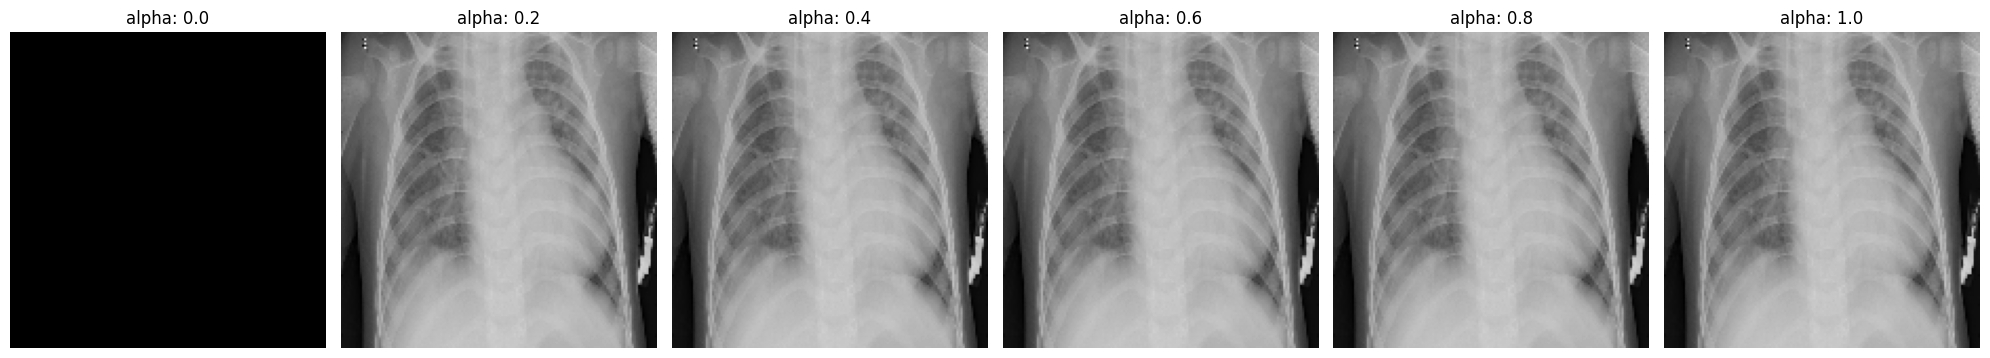

In [69]:
fig = plt.figure(figsize=(20, 20))

i = 0
for alpha, image in zip(alphas[0::10], interpolated_img[0::10]):
  i += 1
  plt.subplot(1, len(alphas[0::10]), i)
  plt.title(f'alpha: {alpha:.1f}')
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.tight_layout();

### Integrated Gradients
$IntegratedGrads^{approx}_{i}(x)::=\overbrace{(x_{i}-x'_{i})}^\text{5.}\times \overbrace{\sum_{k=1}^{m} }^\text{4.} \frac{\partial \overbrace{F(\overbrace{x' + \overbrace{\frac{k}{m} }^\text{1.}\times(x - x'))}^\text{2.} }^\text{3.} }{\partial x_{i} } \times \overbrace{\frac{1}{m} }^\text{4.}$

1. Generate alphas $\alpha$

2. Generate interpolated images = $(x' + \frac{k}{m}\times(x - x'))$

3. Compute gradients between model output predictions with respect to input features = $\frac{\partial F(\text{interpolated path inputs})}{\partial x_{i} }$

4. Integral approximation through averaging gradients = $\sum_{k=1}^m \text{gradients} \times \frac{1}{m}$

5. Scale integrated gradients with respect to original image = $(x_{i}-x'_{i}) \times \text{integrated gradients}$
. The reason this step is necessary is to make sure that the attribution values accumulated across multiple interpolated images are in the same units and faithfully represent the pixel importances on the original image.

In [70]:
# define model
model = pneumonia_clf

# compute gradients
def compute_gradients(images, target_class_idx):
  with tf.GradientTape() as tape:
    tape.watch(images)
    logits = model(images)
    # binary classification
    probs = tf.nn.sigmoid(logits)
  return tape.gradient(probs, images)

In [71]:
path_gradients = compute_gradients(interpolated_img, target_class_idx=0)

In [72]:
print(path_gradients.shape)

(51, 150, 150, 1)


In [73]:
# accumulate gradients
def integral_approximation(gradients):
  # riemann_trapezoidal
  grads = (gradients[:-1] + gradients[1:]) / tf.constant(2.0)
  integrated_gradients = tf.math.reduce_mean(grads, axis=0)
  return integrated_gradients

In [74]:
ig = integral_approximation(path_gradients)

In [75]:
print(ig.shape)

(150, 150, 1)


In [76]:
def integrated_gradients(baseline,
                         image,
                         target_class_idx,
                         m_steps=50,
                         batch_size=32):
  # convert to float32 for numerical stability
  baseline = tf.cast(baseline, tf.float32)
  image = tf.cast(image, tf.float32)

  # Generate alphas.
  alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1)

  # Collect gradients.    
  gradient_batches = []

  # Iterate alphas range and batch computation for speed, memory efficiency, and scaling to larger m_steps.
  for alpha in tf.range(0, len(alphas), batch_size):
    from_ = alpha
    to = tf.minimum(from_ + batch_size, len(alphas))
    alpha_batch = alphas[from_:to]

    gradient_batch = one_batch(baseline, image, alpha_batch, target_class_idx)
    gradient_batches.append(gradient_batch)

  # Concatenate path gradients together row-wise into single tensor.
  total_gradients = tf.concat(gradient_batches, axis=0)

  # Integral approximation through averaging gradients.
  avg_gradients = integral_approximation(gradients=total_gradients)

  # Scale integrated gradients with respect to input.
  integrated_gradients = (image - baseline) * avg_gradients

  return integrated_gradients

@tf.function
def one_batch(baseline, image, alpha_batch, target_class_idx):
    # Generate interpolated inputs between baseline and input.
    interpolated_path_input_batch = interpolate_images(baseline=baseline,
                                                       image=image,
                                                       alphas=alpha_batch)

    # Compute gradients between model outputs and interpolated inputs.
    gradient_batch = compute_gradients(images=interpolated_path_input_batch,
                                       target_class_idx=target_class_idx)
    return gradient_batch

In [77]:
ig_attributions = integrated_gradients(baseline=baseline,
                                        image=x_test[0],
                                        target_class_idx=0,
                                        m_steps=50,
                                        batch_size=32)

Baseline shape:  (1, 150, 150, 1)
Image shape:  (1, 150, 150, 1)
Alphas shape:  (32, 1, 1, 1)
Baseline shape:  (1, 150, 150, 1)
Image shape:  (1, 150, 150, 1)
Alphas shape:  (19, 1, 1, 1)


In [78]:
print(ig_attributions.shape)

(150, 150, 1)


In [79]:
# visualize attributions (baseline, original, attributions, and overlay)
def visualize(img, attributions, alpha=0.6):
    fig, ax = plt.subplots(1, 4, figsize=(20, 20))
    ax[0].imshow(baseline, cmap='gray')
    ax[0].set_title("Baseline")
    ax[0].axis('off')
    ax[1].imshow(img, cmap='gray')
    ax[1].set_title("Original")
    ax[1].axis('off')
    ax[2].imshow(attributions)
    ax[2].set_title("Attributions")
    ax[2].axis('off')
    ax[3].imshow(img, cmap='gray')
    ax[3].imshow(attributions, alpha=alpha)
    ax[3].set_title("Overlay")
    ax[3].axis('off')
    plt.tight_layout()
    plt.show()

In [80]:
# choose five random healthy and pneumonia images
healthy = np.random.choice(np.where(y_test == 0)[0], 5)
pneumonia = np.random.choice(np.where(y_test == 1)[0], 5)

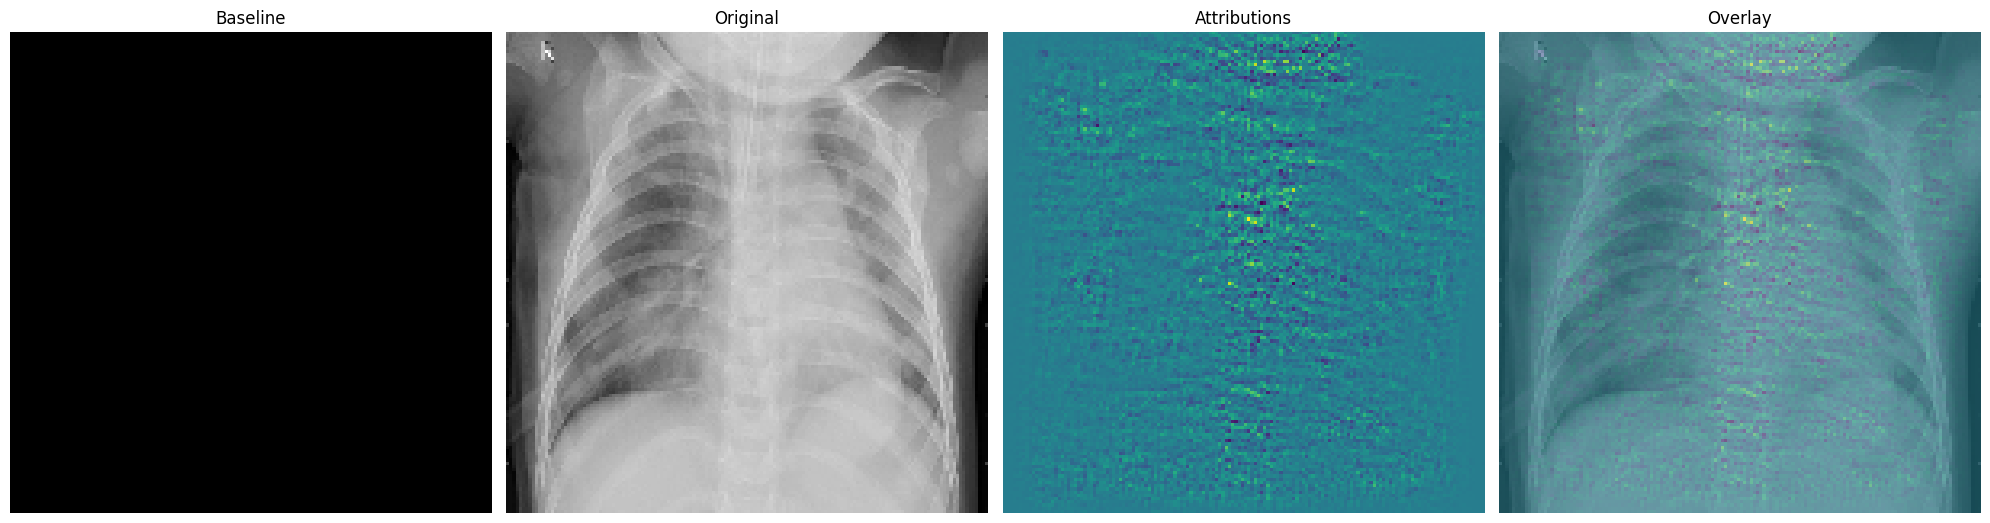

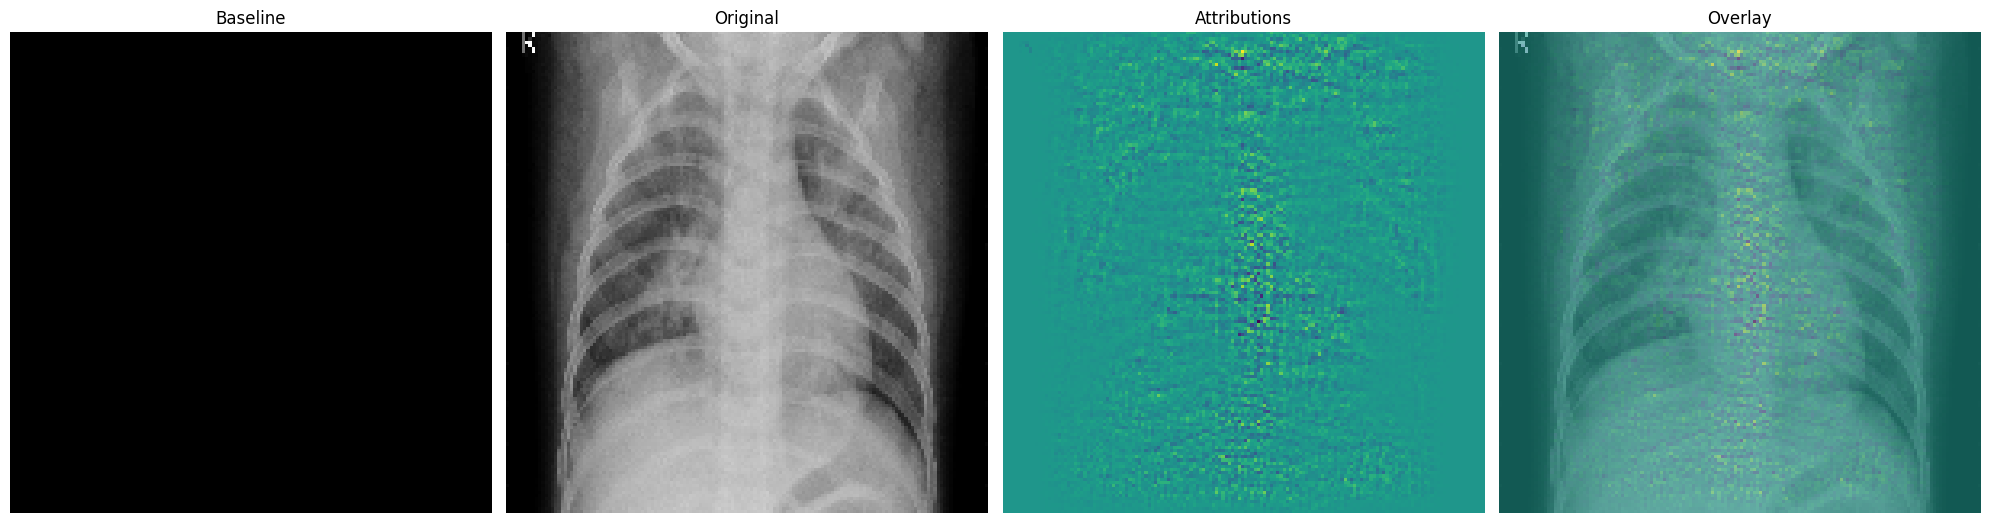

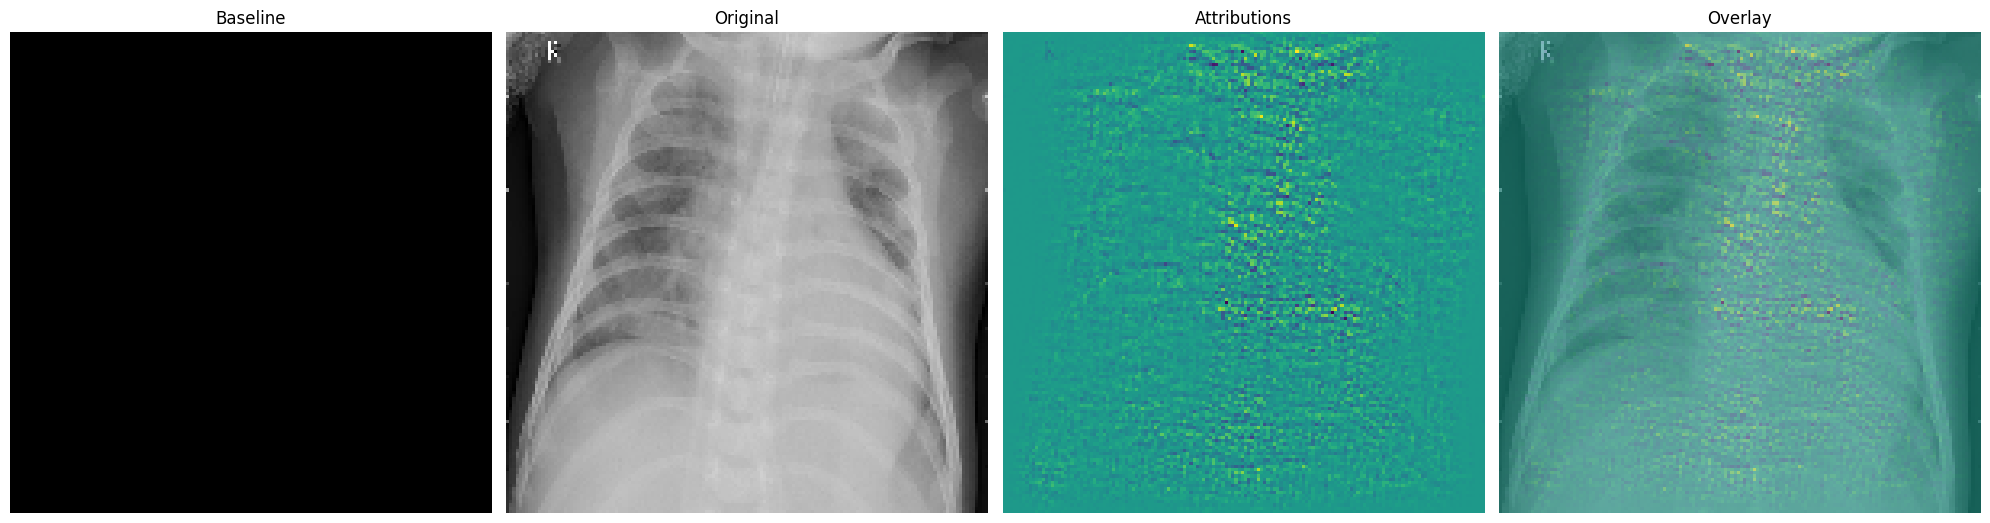

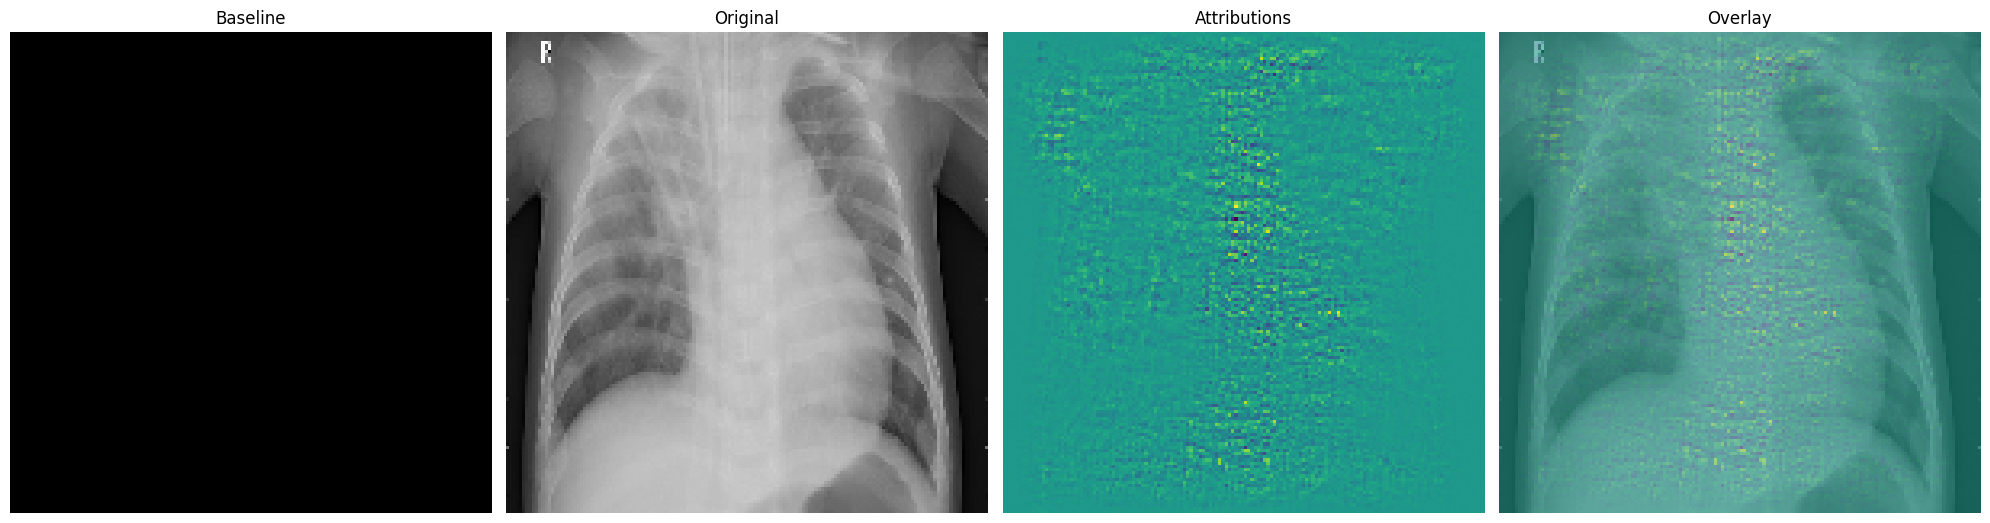

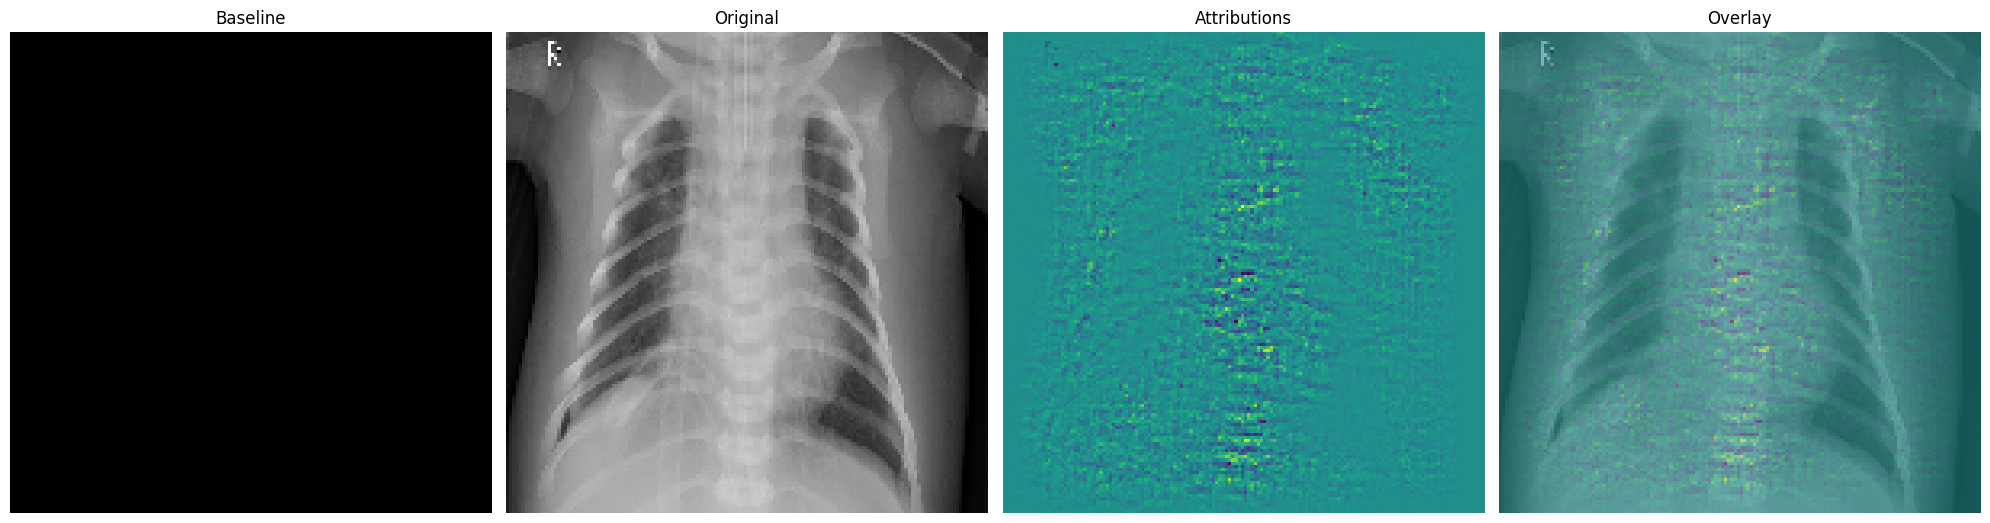

In [81]:
# integrated gradient method
# select healthy images
for i in healthy:
    ig_attributions = integrated_gradients(baseline=baseline,
                                            image=x_test[i],
                                            target_class_idx=0,
                                            m_steps=50,
                                            batch_size=32)
    visualize(x_test[i], ig_attributions)

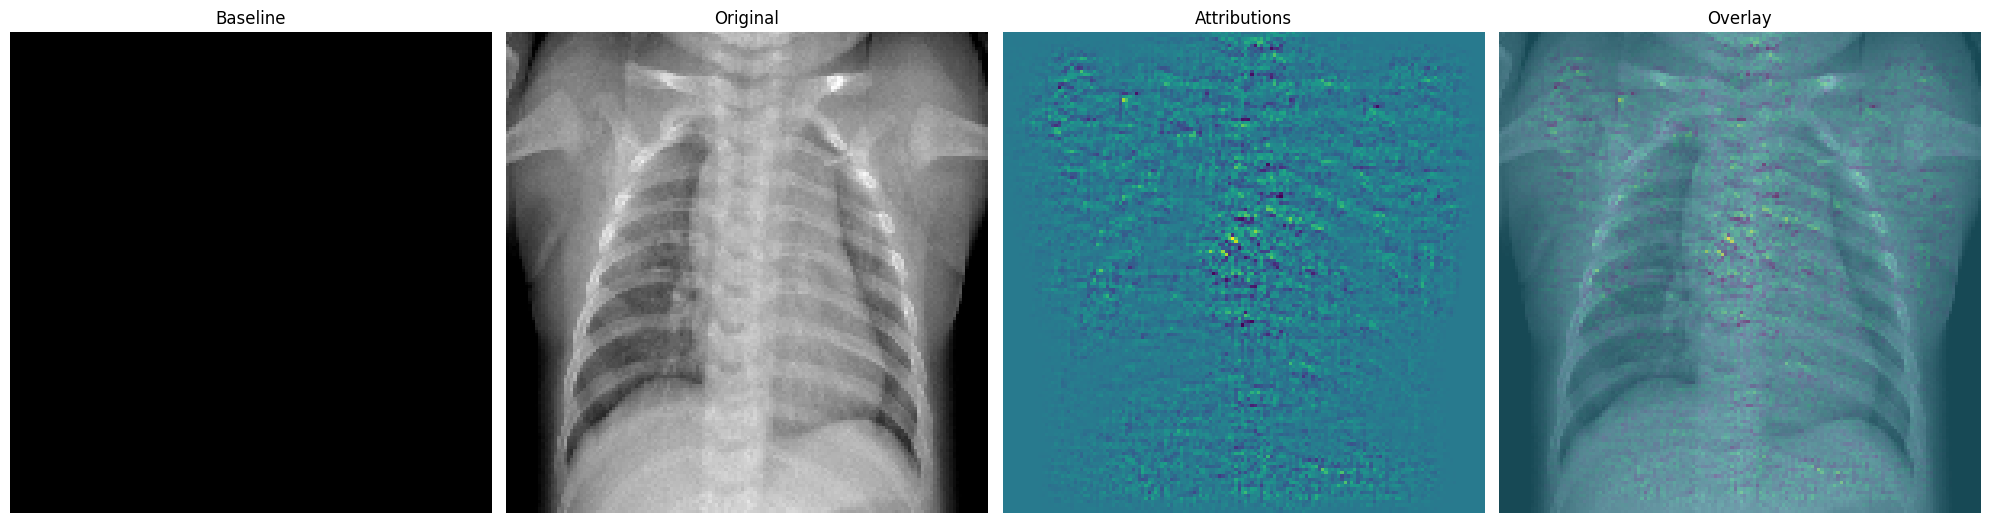

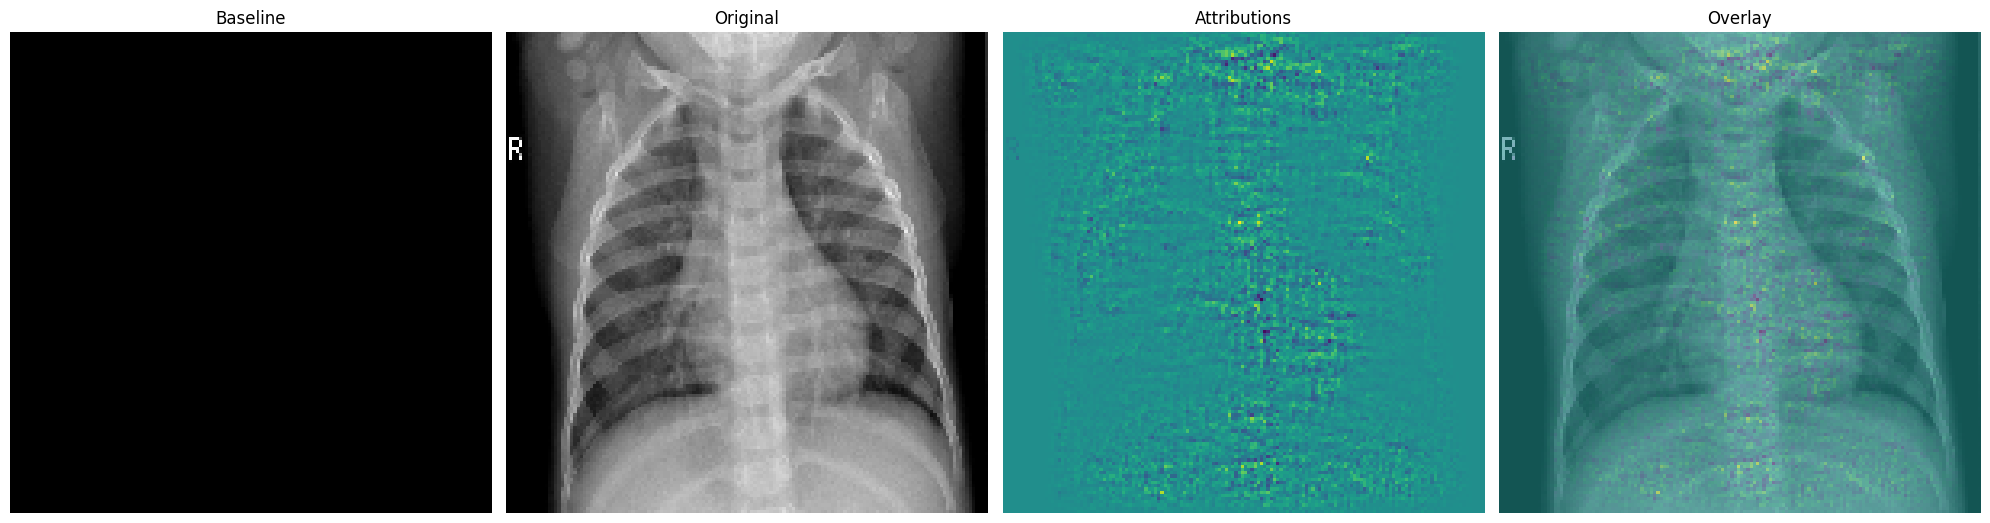

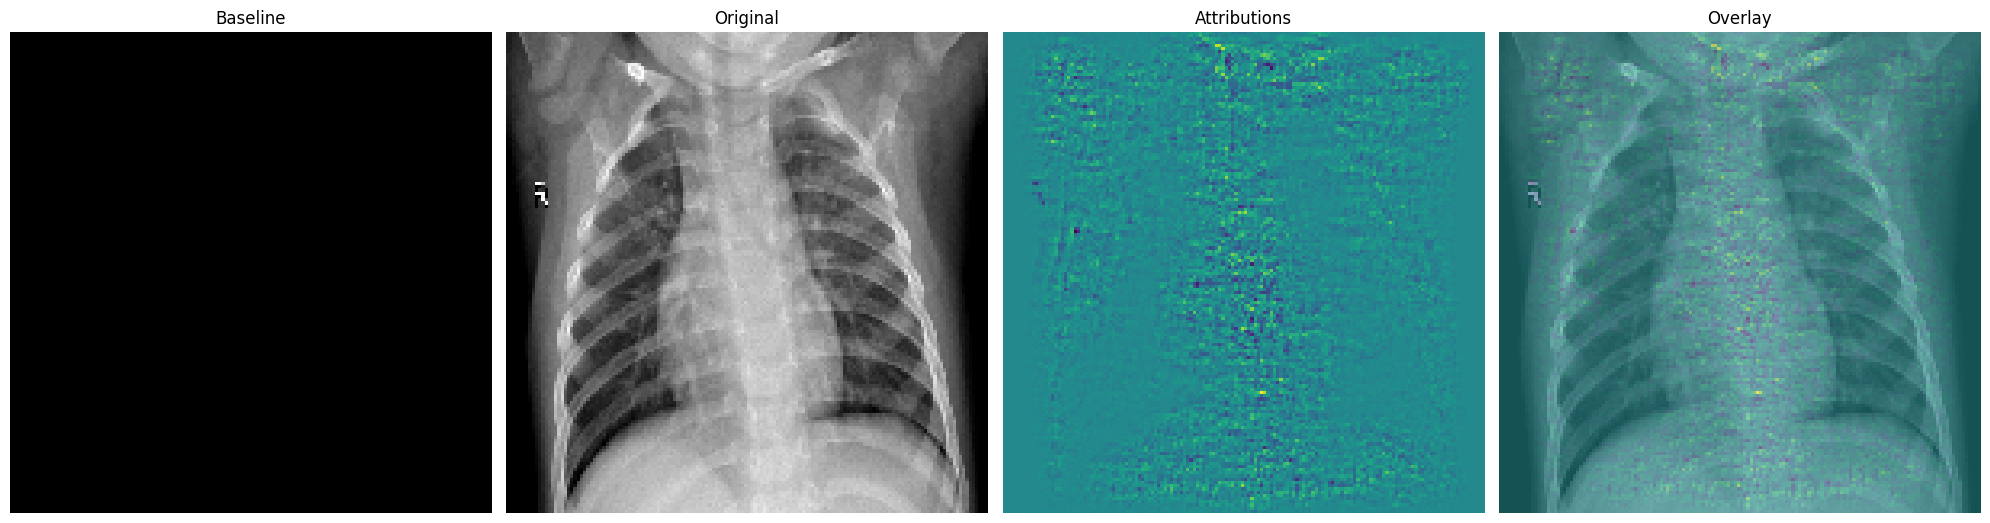

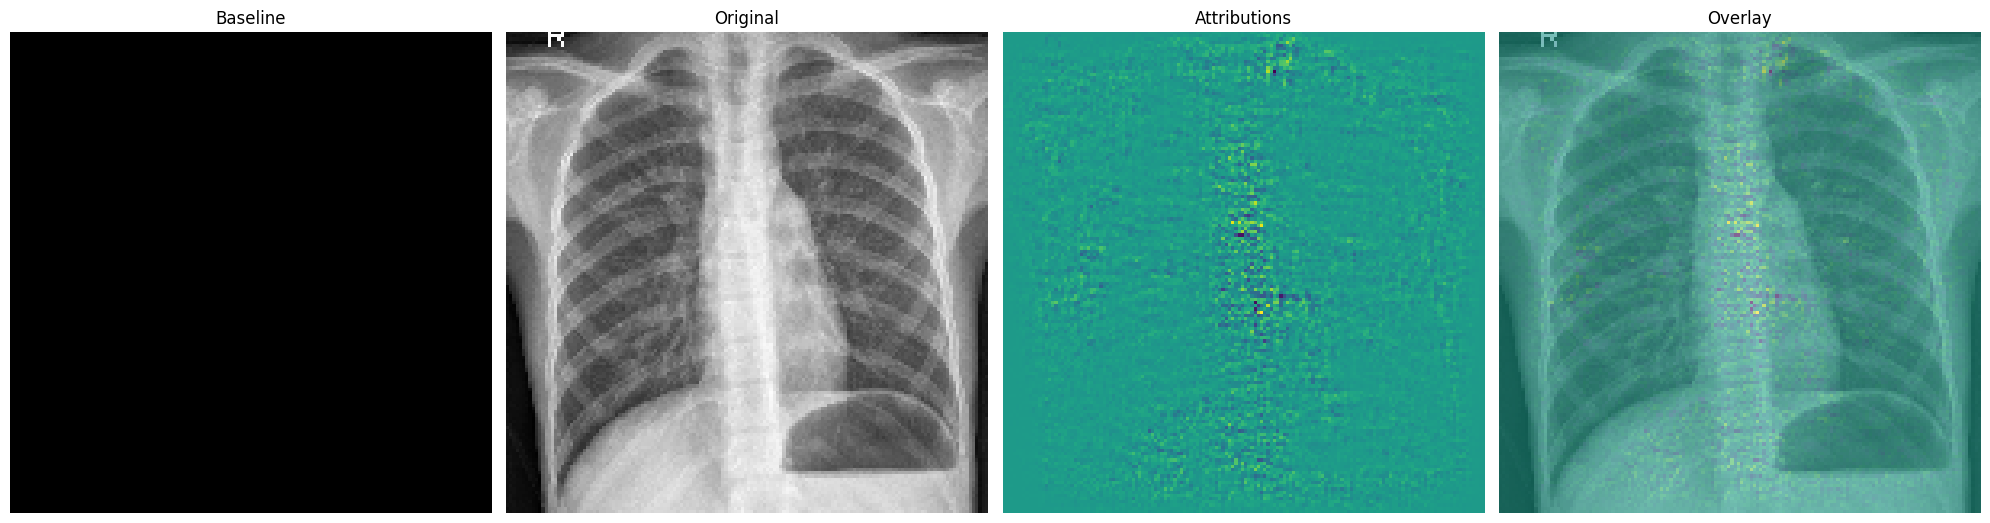

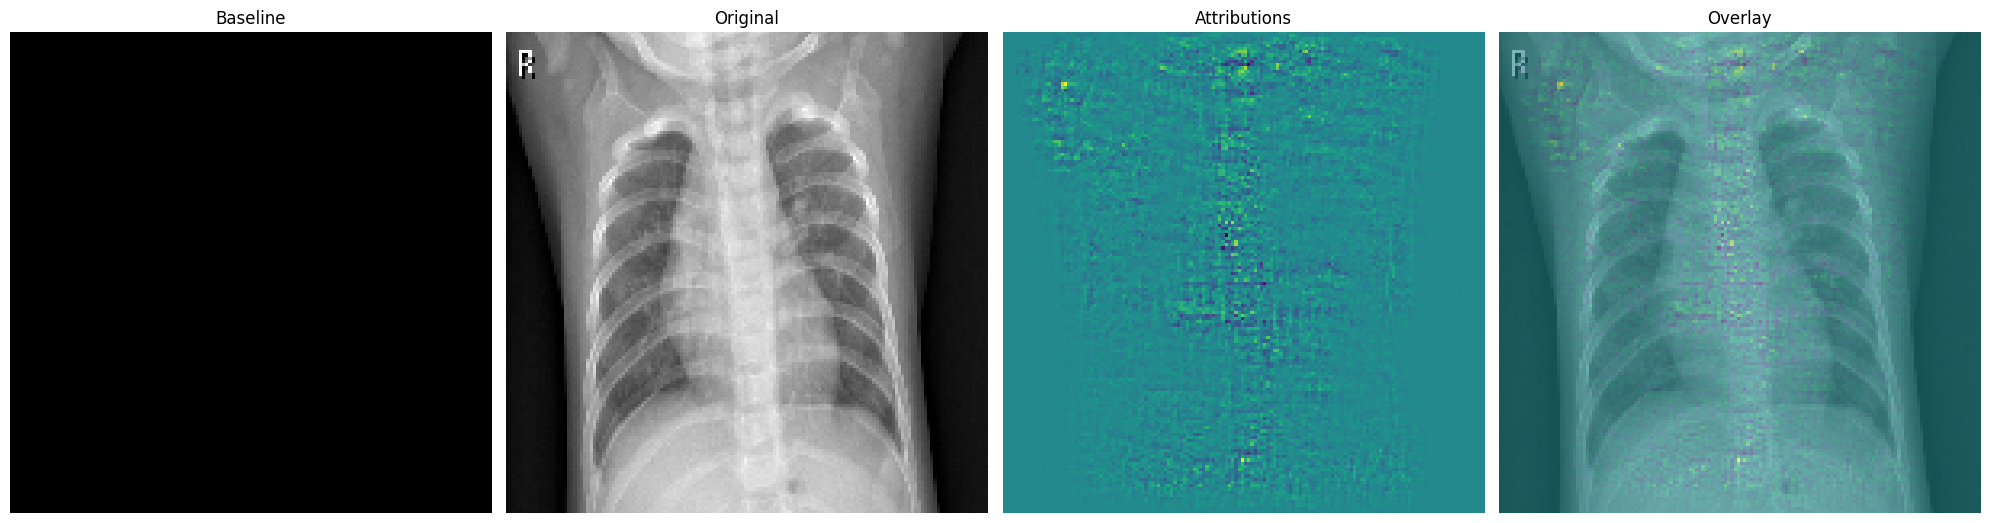

In [82]:
# select pneumonia images
for i in pneumonia:
    ig_attributions = integrated_gradients(baseline=baseline,
                                            image=x_test[i],
                                            target_class_idx=0,
                                            m_steps=50,
                                            batch_size=32)
    visualize(x_test[i], ig_attributions)

## Task 4: Grad-CAM

In [ ]:
# load model
from keras.models import load_model
pneumonia_clf = load_model('models/pneumonia.h5')

In [8]:
pneumonia_clf.predict(x_test[0:1])

1/1 [==============================] - 0s 290ms/step


array([[0.00093906]], dtype=float32)

In [99]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        print(heatmap.shape)
        print(image.shape)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [100]:
image = x_test[0:1]
# image = cv2.resize(image, (224, 224))
# image = image.astype('float32') / 255
# image = np.expand_dims(image, axis=0)

preds = pneumonia_clf.predict(image) 
i = np.argmax(preds[0])

1/1 [==============================] - 0s 23ms/step


In [137]:
for idx in range(len(pneumonia_clf.layers)):
  print(pneumonia_clf.get_layer(index = idx).name)

conv2d_3
batch_normalization_4
max_pooling2d_3
dropout_4
conv2d_4
batch_normalization_5
max_pooling2d_4
dropout_5
conv2d_5
batch_normalization_6
max_pooling2d_5
dropout_6
flatten_1
dense_2
batch_normalization_7
dropout_7
dense_3


dropout_6
(150, 150, 3)
(150, 150, 3)


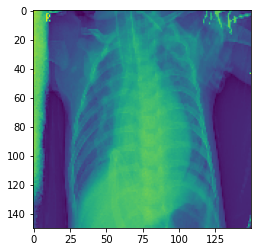

In [143]:
icam = GradCAM(pneumonia_clf, i) 

# find final convolutional layer
print(icam.layerName)

heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (150, 150))

# convert image to match heatmap
image_resized = cv2.resize(image[0], (150, 150))
# show image
plt.imshow(image_resized)

image_resized = image_resized.astype('uint8')
image_resized = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2RGB)

# overlay heatmap on image
(heatmap, output) = icam.overlay_heatmap(heatmap, image_resized, alpha=0.5)

In [148]:
# visualize heatmap and original image
def visualize_cam(img, heatmap, overlay):
    fig, ax = plt.subplots(1, 3, figsize=(10, 10))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Original")
    ax[0].axis('off')
    ax[1].imshow(heatmap)
    ax[1].set_title("grad-CAM")
    ax[1].axis('off')
    ax[2].imshow(overlay)
    # ax[2].set_title("Overlay")
    # ax[2].axis('off')
    ax[2].imshow(img, cmap='gray')
    ax[2].imshow(heatmap, alpha=0.5, cmap='jet')
    plt.tight_layout()
    plt.show()

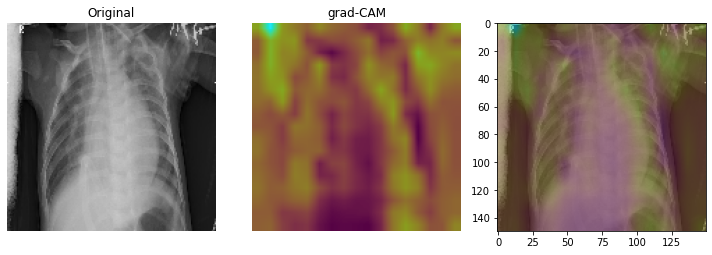

In [149]:
# visualize test image
visualize_cam(image[0], heatmap, output)

In [150]:
# choose five random healthy and pneumonia images
healthy = np.random.choice(np.where(y_test == 0)[0], 5)
pneumonia = np.random.choice(np.where(y_test == 1)[0], 5)

1/1 [==============================] - 0s 32ms/step
(150, 150, 3)
(150, 150, 3)


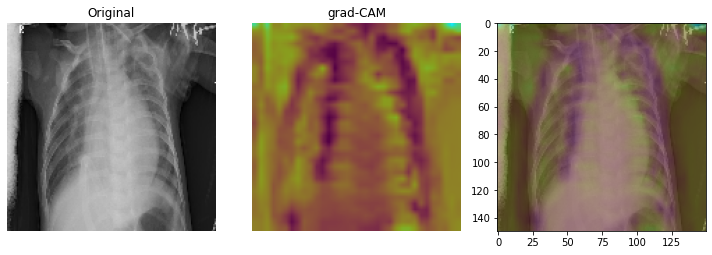

1/1 [==============================] - 0s 23ms/step
(150, 150, 3)
(150, 150, 3)


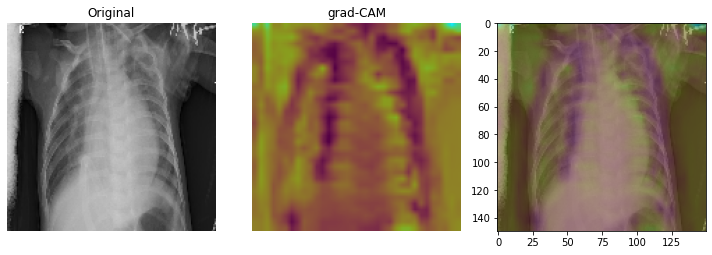

1/1 [==============================] - 0s 22ms/step
(150, 150, 3)
(150, 150, 3)


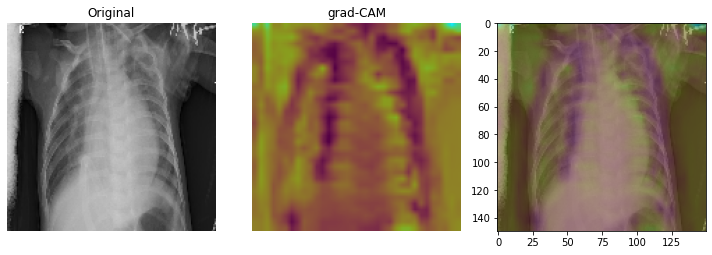

1/1 [==============================] - 0s 21ms/step
(150, 150, 3)
(150, 150, 3)


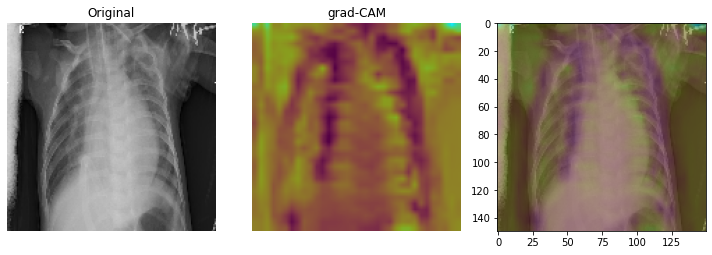

1/1 [==============================] - 0s 24ms/step
(150, 150, 3)
(150, 150, 3)


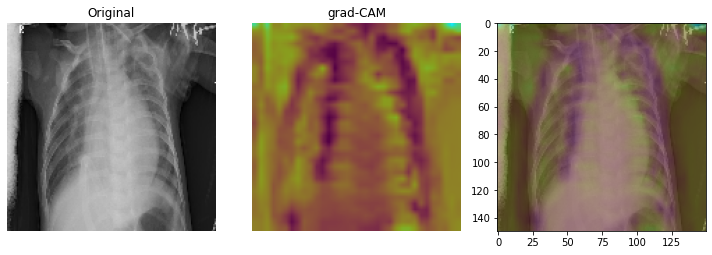

In [151]:
# visualize 5 healthy images
for i in healthy[:5]:
    preds = pneumonia_clf.predict(x_test[i:i+1])
    i = np.argmax(preds[0])
    icam = GradCAM(pneumonia_clf, i, 'conv2d_5') 
    heatmap = icam.compute_heatmap(image)
    heatmap = cv2.resize(heatmap, (150, 150))

    # convert image to match heatmap
    image_resized = cv2.resize(image[0], (150, 150))
    image_resized = image_resized.astype('uint8')
    image_resized = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2RGB)

    # overlay heatmap on image
    (heatmap, output) = icam.overlay_heatmap(heatmap, image_resized, alpha=0.5)
    visualize_cam(image[0], heatmap, output)

1/1 [==============================] - 0s 22ms/step
(150, 150, 3)
(150, 150, 3)


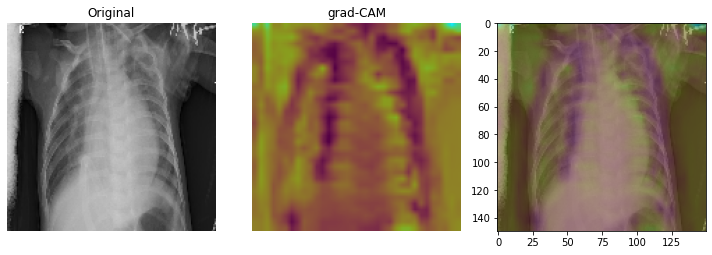

1/1 [==============================] - 0s 26ms/step
(150, 150, 3)
(150, 150, 3)


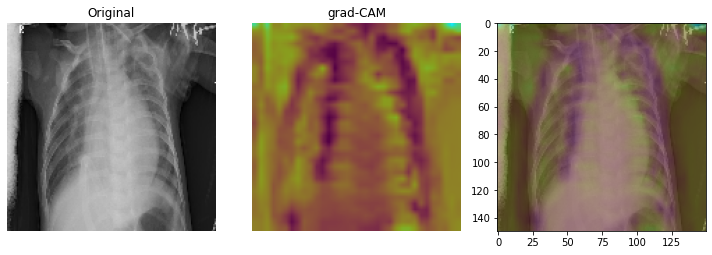

1/1 [==============================] - 0s 24ms/step
(150, 150, 3)
(150, 150, 3)


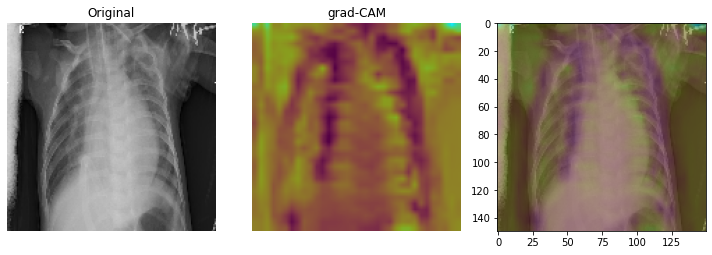

1/1 [==============================] - 0s 24ms/step
(150, 150, 3)
(150, 150, 3)


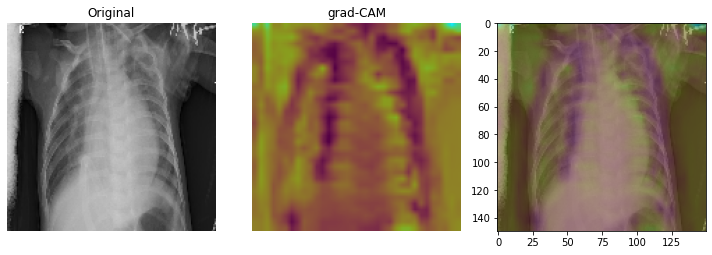

1/1 [==============================] - 0s 42ms/step
(150, 150, 3)
(150, 150, 3)


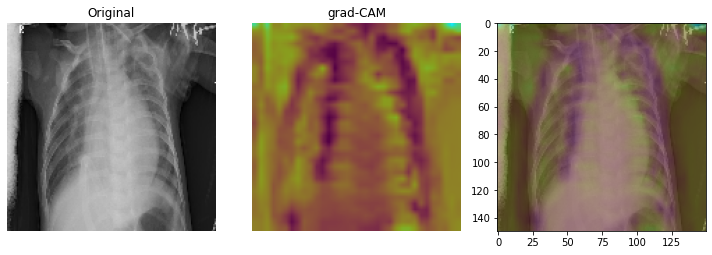

In [152]:
# visualize 5 pneumonia images
for i in pneumonia[:5]:
    preds = pneumonia_clf.predict(x_test[i:i+1])
    i = np.argmax(preds[0])
    icam = GradCAM(pneumonia_clf, i, 'conv2d_5') 
    heatmap = icam.compute_heatmap(image)
    heatmap = cv2.resize(heatmap, (150, 150))

    # convert image to match heatmap
    image_resized = cv2.resize(image[0], (150, 150))
    image_resized = image_resized.astype('uint8')
    image_resized = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2RGB)

    # overlay heatmap on image
    (heatmap, output) = icam.overlay_heatmap(heatmap, image_resized, alpha=0.5)
    visualize_cam(image[0], heatmap, output)

## Task 5: Data Randomization